In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
6  6              Charizard   Fire  Flying    534  78      84       78   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
6      109       85    100           1      False  


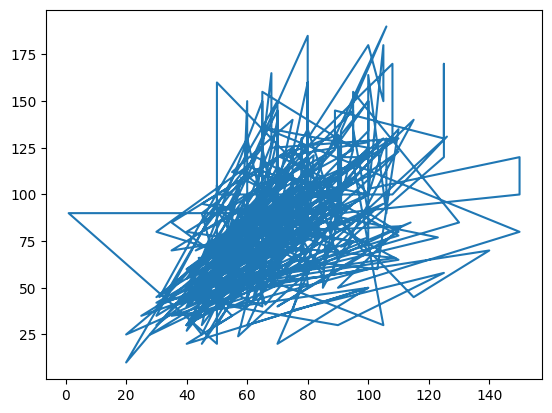

In [ ]:
data = pd.read_csv('Pokemon.csv')
data.dropna(inplace = True)

print(data.head())
plt.plot(data['HP'],data['Attack']) #shows correlation
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


if hp = 21 then attack_dmg = 45.27043006998628


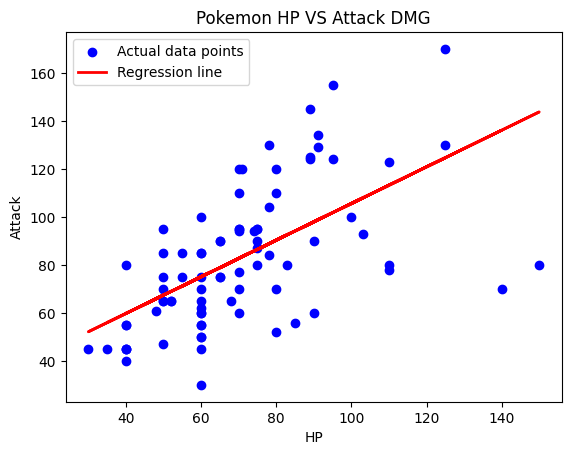

In [ ]:
x = data[['HP']]
y = data[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)
model = LinearRegression()
model.fit(x,y)

hp_val = np.array([[21]])
pred = model.predict(hp_val)
print(f"if hp = {hp_val[0][0]} then attack_dmg = {pred[0][0]}" )


y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='blue', label='Actual data points')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Pokemon HP VS Attack DMG')
plt.legend()
plt.show()

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 3046.2197
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 989.5803
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 977.3434
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 987.0021
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 986.3144
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 990.0245
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 978.9541
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 986.5872
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 977.9905
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 977.1470
Epoch 11/100
83/83 [==============================] - 0s 3ms/step - loss: 969.2587
Epoch 12/100
83/83 [==============================] - 0s 2ms/step - loss: 998.7270
Epoch 13/100

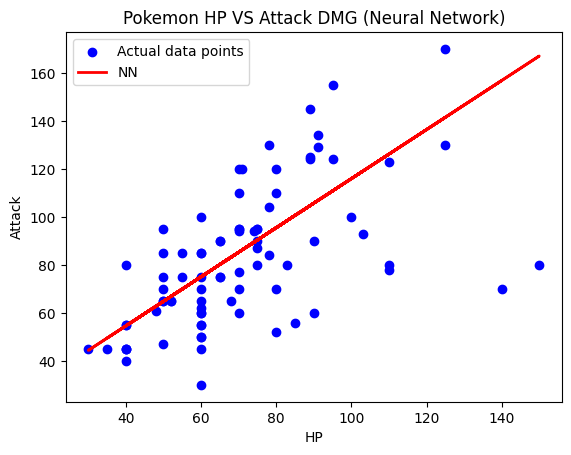

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=100, batch_size=4)

loss = model.evaluate(x_test, y_test)
print(" mse:", loss)

y_pred_nn = model.predict(x_test)

plt.scatter(x_test, y_test, color='blue', label='Actual data points')
plt.plot(x_test, y_pred_nn, color='red', label='NN', linewidth=2)
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Pokemon HP VS Attack DMG (Neural Network)')
plt.legend()
plt.show()